In [4]:
from universal.data import *
from universal import tools
from universal.algos import *
import gym
from gym import spaces

In [5]:
#sp_data = tools.dataset("nyse_o")
#sp_data = pd.read_csv('new_sp500.csv')
sp_data = pd.read_csv('SP500_30.csv')
test_set = sp_data.tail(round(0.2*len(sp_data)))
test_set

,AAL-close,AAPL-close,AAP-close,ABBV-close,ABC-close,ABT-close,ACN-close,ADBE-close,ADI-close,ADM-close,...,AIV-close,AIZ-close,AJG-close,AKAM-close,ALB-close,ALGN-close,ALK-close,ALL-close,ALXN-close,AMAT-close
1007,45.06,132.04,162.73,60.52,91.07,42.40,115.43,116.13,77.48,43.46,...,45.30,90.45,54.06,63.55,94.35,94.17,97.20,77.99,126.37,35.60
1008,46.30,132.42,164.83,60.84,91.65,42.54,116.98,116.44,76.51,43.54,...,45.12,91.36,54.71,63.85,93.91,95.98,98.41,78.35,127.08,35.41
1009,46.45,132.12,164.05,60.42,91.17,42.74,117.60,116.85,76.53,43.83,...,45.72,92.93,55.17,63.95,93.70,96.97,97.35,78.88,126.51,35.32
1010,47.41,133.29,162.39,60.51,90.48,43.22,118.59,117.65,77.92,43.71,...,45.52,94.32,55.55,63.60,94.75,97.61,98.02,79.61,127.77,35.46
1011,46.57,135.02,164.37,60.82,90.82,43.65,120.00,117.58,77.84,43.73,...,45.36,95.25,55.56,63.55,91.19,98.39,96.30,79.80,129.50,35.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,53.88,167.78,117.29,116.34,99.29,62.18,160.46,199.38,91.65,42.46,...,40.80,93.06,69.19,67.56,109.20,255.57,64.08,98.72,118.09,53.28
1255,52.10,160.50,113.93,115.17,96.02,61.69,156.90,195.64,89.11,41.43,...,40.55,91.95,68.57,65.72,105.51,257.38,64.56,97.94,116.15,50.68
1256,49.76,156.49,109.86,109.51,91.90,58.73,151.83,190.27,85.40,40.60,...,39.67,88.18,66.27,62.81,105.15,242.40,62.74,95.02,112.72,48.31
1257,51.18,163.03,112.20,111.20,91.54,58.86,154.69,194.47,88.54,42.00,...,39.62,88.49,65.40,63.67,107.54,241.45,63.19,96.60,114.91,50.25


In [6]:
test_set.shape

(252, 30)

1.6223766056271431


[<AxesSubplot:ylabel='Total wealth'>, <AxesSubplot:ylabel='weights'>]

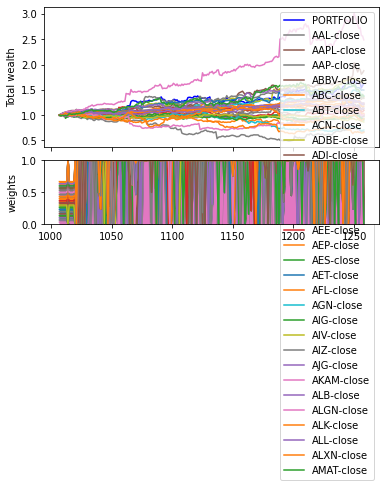

In [9]:
algo = CORN()
result = algo.run(test_set)

print(result.total_wealth)
result.plot()

In [10]:
wealth = 1
for i in range(24):
    new_test = test_set.iloc[10*i:10*i+10]
    algo = CORN()
    result = algo.run(new_test)
    wealth = wealth * result.total_wealth
    print(result.total_wealth)
print("-------------------------")
print(wealth)


1.033483883230081
0.9961532536636363
1.0037775708873902
0.9973436151205362
1.0036270318986227
1.07696591723923
0.9684435500923202
0.9876084563426775
1.00891032732726
0.9913609265352387
1.0061743576731046
1.0299002797607504
0.9739358516983502
0.9962940047809944
1.0750609292023645
0.9829885983263901
1.0199024771566823
1.0172365066125533
1.0018170847596288
1.0062119148835622
0.9944258466911741
1.0180455910618573
1.0232648820757424
1.017745984926995
-------------------------
1.248600123481315


In [29]:
next_observation = test_set.iloc[10:20].reset_index(drop=True)
pre_observation = test_set.iloc[0:10].reset_index(drop=True)

In [30]:
next_observation

,AAPL,ATVI,CMCSA,COST,CSX,DISH,EA,EBAY,FB,GOOGL,HAS,ILMN,INTC,MAR,REGN,SBUX
0,2.012108,3.361670,1.943226,1.710770,2.180701,1.644793,4.988486,0.593430,4.741986,2.164966,2.435994,3.164505,1.722857,2.123505,2.176031,2.045059
1,2.014024,3.396719,1.955613,1.727405,2.206645,1.661530,4.982153,0.601554,4.744789,2.156851,2.454317,3.144654,1.739524,2.125458,2.176332,2.039383
2,2.018003,3.407159,1.937032,1.727989,2.217114,1.661265,5.008636,0.605440,4.778770,2.161583,2.448042,3.278695,1.738571,2.134489,2.248915,2.014547
3,2.018888,3.365399,1.931355,1.723709,2.210287,1.647184,4.979850,0.598728,4.748292,2.149524,2.431476,3.290094,1.723810,2.123261,2.251628,2.017740
4,2.060153,3.515287,1.940129,1.730324,2.239873,1.646918,5.055843,0.605263,4.814153,2.179595,2.458082,3.317610,1.710952,2.159873,2.285086,2.027319
5,2.047920,3.480984,1.932903,1.731491,2.210287,1.615834,5.009211,0.598905,4.791032,2.162041,2.448042,3.296384,1.710000,2.136197,2.265855,2.026610
6,2.060005,3.510067,1.921032,1.656387,2.252162,1.625399,5.022453,0.595903,4.805395,2.160082,2.453564,3.311714,1.709524,2.118379,2.282735,2.025900
7,2.053521,3.565250,1.932387,1.622045,2.266272,1.626727,5.016695,0.594136,4.814153,2.155477,2.435743,3.276140,1.693810,2.116671,2.302448,2.010999
8,2.056173,3.583893,1.931355,1.624672,2.204825,1.700319,5.083477,0.591134,4.809949,2.165348,2.439759,3.254324,1.704762,2.102758,2.245720,1.993968
9,2.048510,3.622670,1.915355,1.617278,2.168867,1.700053,5.123777,0.588485,4.824663,2.171683,2.444277,3.231132,1.696190,2.108616,2.299072,1.977648


In [31]:
pre_observation

,AAPL,ATVI,CMCSA,COST,CSX,DISH,EA,EBAY,FB,GOOGL,HAS,ILMN,INTC,MAR,REGN,SBUX
0,1.945937,2.922446,1.927484,1.638486,2.182977,1.616897,4.690846,0.587248,4.701349,2.111237,2.425201,3.202830,1.732381,2.107884,2.129551,1.959198
1,1.951537,2.962714,1.936258,1.663197,2.173418,1.622476,4.793322,0.584952,4.699247,2.111694,2.453313,3.206368,1.688571,2.118379,2.170244,1.980131
2,1.947116,3.521999,1.939355,1.673315,2.174329,1.624601,4.960852,0.593960,4.700998,2.123880,2.450552,3.204403,1.682857,2.110081,2.169460,1.994678
3,1.964359,3.407905,1.953806,1.672925,2.180701,1.645855,4.969488,0.596786,4.696094,2.134336,2.463102,3.220126,1.704762,2.132780,2.264649,1.990775
4,1.989855,3.354213,1.963613,1.689172,2.184797,1.645855,4.954519,0.593960,4.689087,2.137058,2.454819,3.232311,1.710952,2.145228,2.269834,2.007451
5,1.997076,3.391499,1.976645,1.702500,2.154756,1.670829,5.063328,0.600671,4.674724,2.130164,2.455823,3.209316,1.716667,2.183549,2.314926,2.017385
6,1.994644,3.384787,1.961032,1.709797,2.170687,1.666312,5.057571,0.592370,4.688737,2.142503,2.450803,3.170204,1.733810,2.183061,2.248734,2.012773
7,2.000171,3.380313,1.943742,1.710867,2.209376,1.670829,5.025907,0.596256,4.677877,2.153645,2.472390,3.210888,1.737143,2.181108,2.237642,2.034770
8,2.014614,3.381059,1.955613,1.721374,2.226218,1.668969,5.039724,0.599082,4.684533,2.160565,2.481928,3.186910,1.739048,2.147669,2.240234,2.041511
9,2.020656,3.372856,1.958194,1.717190,2.202549,1.657811,5.030512,0.597315,4.768611,2.165882,2.480422,3.189858,1.717619,2.140103,2.231854,2.042576


In [32]:
algo = BCRP()
result = algo.run(pre_observation)
weights = result.B
algo = BCRP()
result = algo.run(next_observation)
map_X = result.X 
r = (map_X - 1) * weights
r = r.sum(axis=1) + 1
reward = r.prod()

In [37]:
r

0    1.000000
1    1.010426
2    1.003074
3    0.987743
4    1.044538
5    0.990242
6    1.008355
7    1.015721
8    1.005229
9    1.010820
dtype: float64

In [36]:
reward

1.0776397517698937

In [38]:
r.prod()

1.0776397517698937